**# EXAMEN** 

**# AMTONIO MILTOS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Objectivos
*    ¿Cuál es el % de Clientes Churn y de clientes que se mantienen con los servicios activos? 
*    ¿Existe algún patrón en la pérdida de clientes según el género?
*    ¿Existe algún patrón/preferencia en la rotación de clientes según el tipo de servicio prestado?
*    ¿Cuáles son los tipos de servicios más rentables?

In [2]:
# Cargar el archivo en un DataFrame
file_path = r'C:\Users\anton\OneDrive\Documentos\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Se verifica que totalchenges contiene 11 valores faltantes 

In [10]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Podemos observar los 11 valares faltantes de la columna TotalCharges y tambien visualizamos que la columna Tenure tienen todos llos valores 0

In [11]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [12]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [13]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [17]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [18]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']


fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])


fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"), 1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"), 1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)


fig.update_layout(
    title_text="Distribuciones de género y abandono",
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)]
)


fig.show()

En mi experecia laboral como operador de atencion al cliente visualizo este grafico y veo las distribuciones sobre genero 

In [19]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Distribución de contratos de clientes.<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Normalmente los contratos depediendo de la empresa son seis meses de permanencia minima ya que es una politica de la empresa y el contrato en servicio dependeria si es pospago o prepago y dependiendo del servicio los servicio de hogar normalmente son pospago ya que estas abonando una x tarifa por el mes y prepago normalmente es del servicio de telefonia 

In [20]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [28]:

fig = go.Figure()
fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(
    title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>",
    xaxis_title="Churn and Gender",
    yaxis_title="Number of Customers",
    barmode='group'
)

fig.show()

Una gran cantidad de clientes eligen el servicio de Fibra óptica y también es evidente que los clientes que utilizan Fibra óptica tienen una alta tasa de abandono, esto podría sugerir una insatisfacción con este tipo de servicio de Internet.
Los clientes que tienen servicio DSL son mayoritarios y tienen una menor tasa de abandono en comparación con el servicio de fibra óptica.

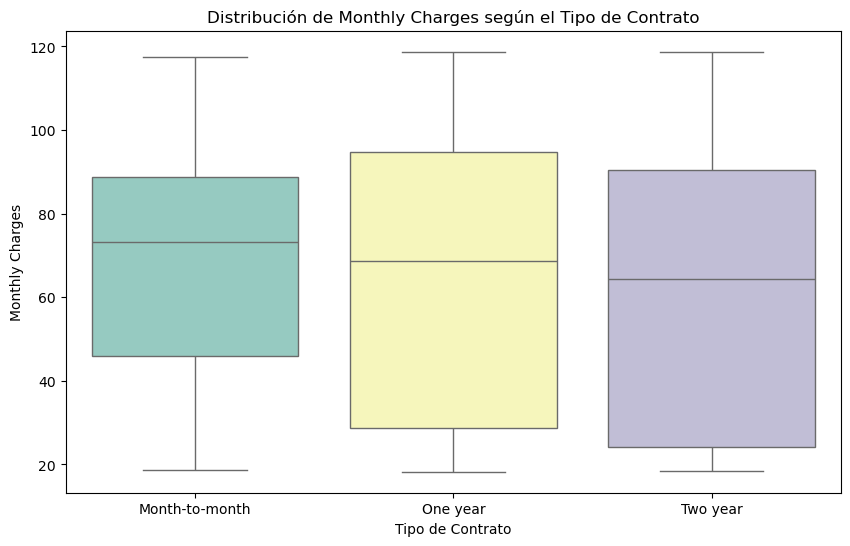

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', palette="Set3")
plt.title("Distribución de Monthly Charges según el Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Monthly Charges")
plt.show()

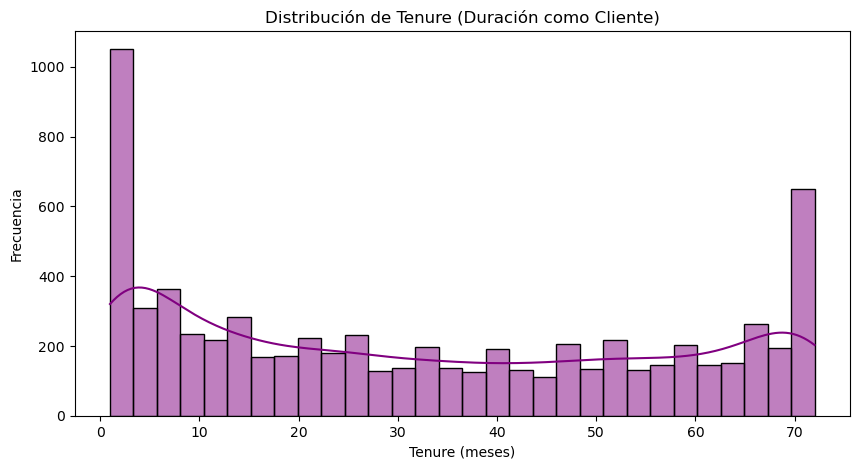

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], bins=30, kde=True, color="purple")
plt.title("Distribución de Tenure (Duración como Cliente)")
plt.xlabel("Tenure (meses)")
plt.ylabel("Frecuencia")
plt.show()

Distribución de Tenure (Duración como Cliente) : La distribución de tenuremuestra que hay una gran cantidad de clientes con duraciones de contrato muy cortas (alrededor de pocos meses) y también un grupo que ha estado por períodos prolongados. Esto podría indicar una mezcla entre nuevos clientes y clientes leales a largo plazo.

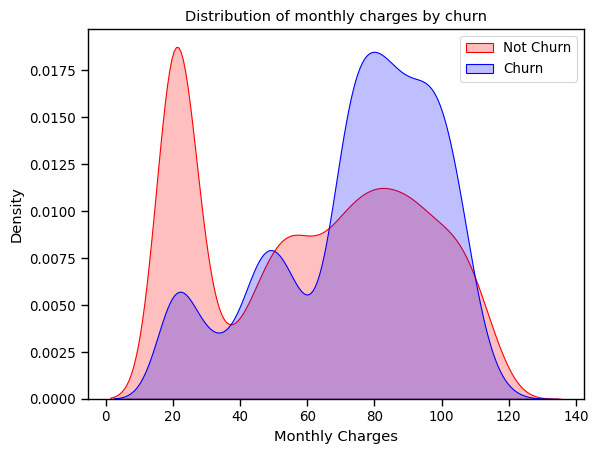

In [23]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


Los clientes con cargos mensuales más altos también tienen más probabilidades de abandonar

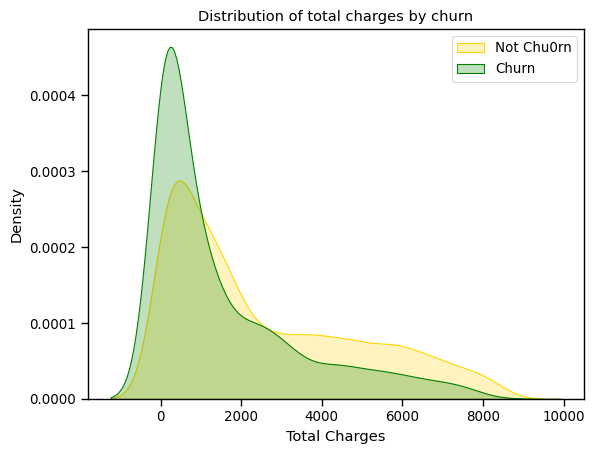

In [24]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [25]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


Es más probable que los nuevos clientes abandonen

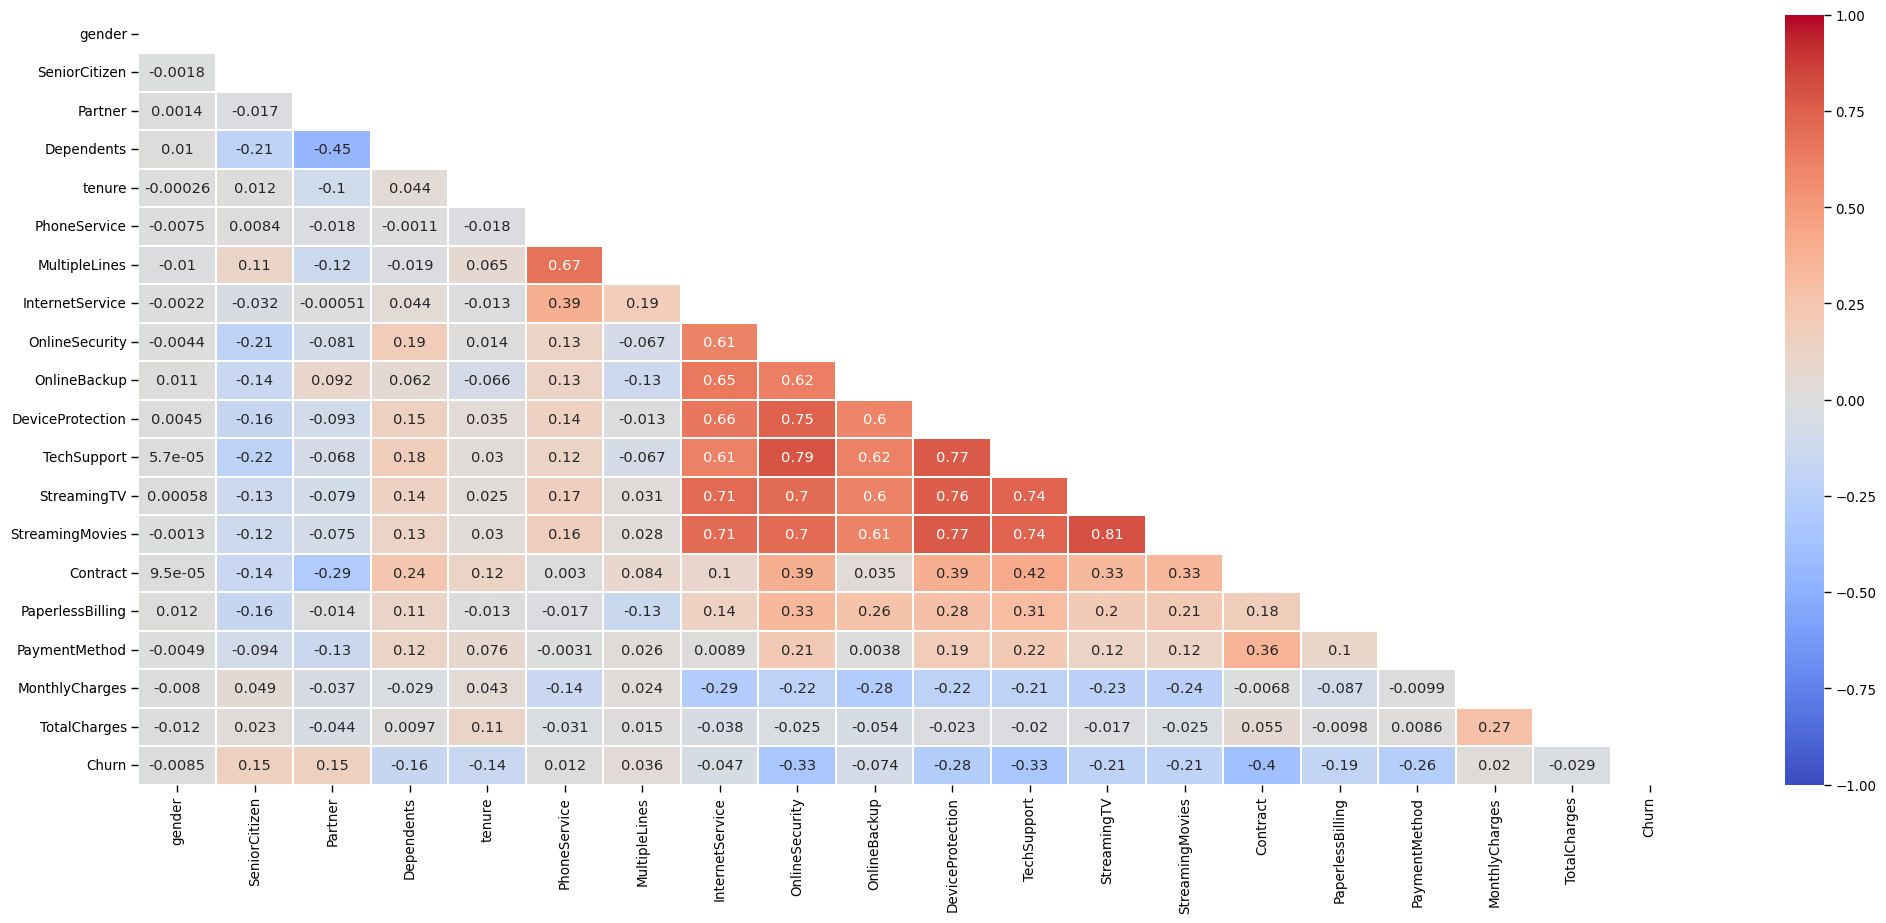

In [26]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Hay una clasificación positiva notable entre `tenure` y `TotalCharges`, lo que indica que los clientes que han estado más tiempo tienden a acumular mayores cargas totales. Esto confirma que la duración es un factor importante en el valor de un cliente para la empresa

In [27]:
# Calcular el porcentaje de clientes que abandonaron el servicio (Churn) y que permanecen
churn_counts = df['Churn'].value_counts(normalize=True) * 100
churn_counts_dict = churn_counts.to_dict()

# Análisis de patrones de pérdida de clientes según género
gender_churn = df.groupby(['gender', 'Churn']).size().unstack()
gender_churn_percentage = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100

# Análisis de patrones de rotación de clientes según el tipo de servicio de Internet
internet_service_churn = df.groupby(['InternetService', 'Churn']).size().unstack()
internet_service_churn_percentage = internet_service_churn.div(internet_service_churn.sum(axis=1), axis=0) * 100

# Análisis de los servicios más rentables: Promedio de MonthlyCharges por tipo de servicio de internet
avg_monthly_charges_by_service = df.groupby('InternetService')['MonthlyCharges'].mean()

churn_counts_dict, gender_churn_percentage, internet_service_churn_percentage, avg_monthly_charges_by_service

({'No': 73.42150170648463, 'Yes': 26.578498293515356},
 Churn          No        Yes
 gender                      
 Female  73.040482  26.959518
 Male    73.795435  26.204565,
 Churn                   No        Yes
 InternetService                      
 DSL              81.001656  18.998344
 Fiber optic      58.107235  41.892765
 No               92.565789   7.434211,
 InternetService
 DSL            58.088017
 Fiber optic    91.500129
 No             21.076283
 Name: MonthlyCharges, dtype: float64)

**# Conclusión**

Porcentaje de Clientes que Abandonaron y que Permanecen 

*   Clientes que permanecen : 73,46%
*   Clientes que abandonan (Churn) : 26,54%

La tasa de abandono es considerable, con aproximadamente 1 de cada 4 clientes dejando el servicio.
Patrón de Pérdida de Clientes según Género 
*   Femenino : 26,92% de abandono
*   Masculino : 26,16% de abandono

No se observa un patrón de abandono notable por género, ya que ambos presentan tasas de abandono similares.

# Conclusión Personal
*  En base que actualmente trabajp como operador de call center en una empresa de telecomunicaciones los casos de bajas de servicio por migrar a la competencia precio - servicio son casps donde el cliente normalmente cansado del servicio adquirido solicita la baja del mismo en este caso hay una area especial que intenta retener al cliente ofreciendo descuentos y mas lo que falta añadir a este dataset seria una columna de motivo de baja ya que podiamos realizar un mayor analisis de porque el cliente migra y medir el descontento con la compañia.Tambien hay casos donde la zona donde esta el cliente el servicio adquirido esta constantemente con problemas de la zona de distribucion de la señal o llamados nodo y tap suele tener muchas anomalias o sobreoiblacion clientes en un mismo nodo o tap que afecta al servicio ya sea fo o hfc donde el cliente ante tantos incovemoemtes con su servicio suele migrar a la competencia si es por mi la causas de las reagenda constante de la asistencias tecnicas (ot) cliente cansado de constante postergaciones de la fecha normalmente solicita la baja del servicio Yo por lo menos que faltan mas datos para concluir realmente cual deberia ser el la predicion completa 
